In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import joblib 
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

In [13]:
data = pd.read_csv('housing_all_encoded.csv')
data = data.drop(columns= 'Unnamed: 0')

In [14]:
data.head()

,year,floor_area_sqm,range_numeric,lease_commence_date,remaining_lease,resale_price,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,district_East,district_North,district_North-East,district_West
0,1990,-2.506989,0.680780,1977,0.463430,9000.0,False,False,False,False,False,False,False,False,True,False
1,1990,-2.506989,-0.558727,1977,0.463430,6000.0,False,False,False,False,False,False,False,False,True,False
2,1990,-2.506989,0.680780,1977,0.463430,8000.0,False,False,False,False,False,False,False,False,True,False
3,1990,-2.506989,0.061026,1977,0.463430,6000.0,False,False,False,False,False,False,False,False,True,False
4,1990,-0.879230,-0.558727,1976,0.371238,47200.0,False,True,False,False,False,False,False,False,True,False


In [15]:
#splitting Data into training and testing

X = data.drop('resale_price', axis=1)
y = data['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X.head()

,year,floor_area_sqm,range_numeric,lease_commence_date,remaining_lease,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,district_East,district_North,district_North-East,district_West
0,1990,-2.506989,0.680780,1977,0.463430,False,False,False,False,False,False,False,False,True,False
1,1990,-2.506989,-0.558727,1977,0.463430,False,False,False,False,False,False,False,False,True,False
2,1990,-2.506989,0.680780,1977,0.463430,False,False,False,False,False,False,False,False,True,False
3,1990,-2.506989,0.061026,1977,0.463430,False,False,False,False,False,False,False,False,True,False
4,1990,-0.879230,-0.558727,1976,0.371238,False,True,False,False,False,False,False,False,True,False


In [33]:
X.columns

Index(['year', 'floor_area_sqm', 'range_numeric', 'lease_commence_date',
       'remaining_lease', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'flat_type_MULTI-GENERATION', 'district_East', 'district_North',
       'district_North-East', 'district_West'],
      dtype='object')

In [17]:
y.head()


0     9000.0
1     6000.0
2     8000.0
3     6000.0
4    47200.0
Name: resale_price, dtype: float64

In [23]:

# Define the updated parameter distribution
param_distributions = {
    'max_samples': [0.6, 0.7, 0.8, 0.9],
    'oob_score': [True, False],
    'ccp_alpha': [0.0, 0.001, 0.01],
    'warm_start': [True, False],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt', 'log2', 0.5],
    'n_estimators': [150, 200, 300]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(
        random_state=42,
    ),
    param_distributions=param_distributions,
    n_iter=30,  # Increased iterations to explore more parameter combinations
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42,
)

# Fit to training data
random_search.fit(X_train, y_train)

# Get best parameters




Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.001, 0.01],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', 0.5],
                                        'max_samples': [0.6, 0.7, 0.8, 0.9],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [150, 200, 300],
                                        'oob_score': [True, False],
                                        'warm_start': [True, False]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [24]:
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Best model
best_model = random_search.best_estimator_
# Evaluate on the full test set

Best Parameters: {'warm_start': True, 'oob_score': False, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_samples': 0.7, 'max_features': 'log2', 'max_depth': 30, 'ccp_alpha': 0.001}


In [18]:

best_model = RandomForestRegressor(random_state= 42,
        warm_start= False,
        oob_score= True,
        max_samples = 0.8,
        ccp_alpha= 0.001,
        n_estimators=200,
        min_samples_split=5,
        min_samples_leaf=1,
        max_features='auto',
        max_depth=80
)

best_model.fit(X_train,y_train)


c:\Users\firas\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(ccp_alpha=0.001, max_depth=80, max_features='auto',
                      max_samples=0.8, min_samples_split=5, n_estimators=200,
                      oob_score=True, random_state=42)

In [31]:
best_model = RandomForestRegressor(random_state= 42,
                                   n_estimators= 200,
                                   max_depth= None,
                                   min_samples_split=2)
best_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

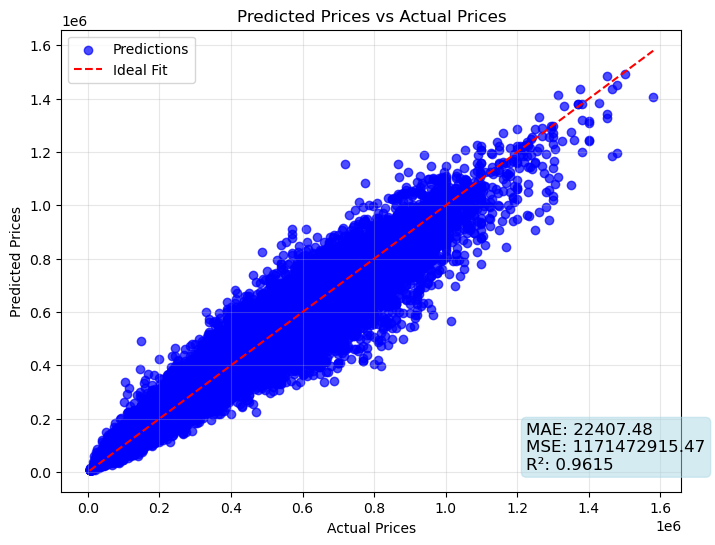

In [32]:
y_pred = best_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')


# Add labels, title, and legend
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices vs Actual Prices")
plt.legend()
plt.grid(alpha=0.3)

# Display the metrics on the plot
metrics_text = f"MAE: {mae:.2f}\nMSE: {mse:.2f}\nR²: {r2:.4f}"
plt.gca().text(0.75, 0.15, metrics_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
               bbox=dict(boxstyle="round", alpha=0.5, color="lightblue"))
# Display the plot
plt.show()


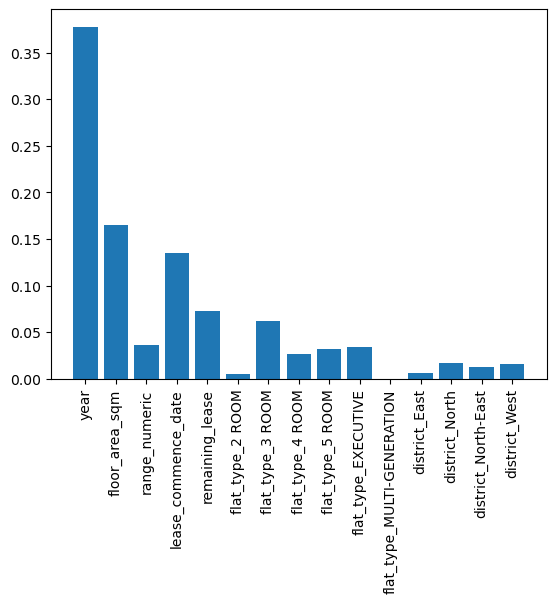

In [26]:
importance = best_model.feature_importances_
plt.bar(X.columns, importance)
plt.xticks(rotation=90)
plt.show()

In [27]:
joblib.dump(best_model, 'price_prediction_model_all.pkl')

['price_prediction_model_all.pkl']

In [ ]:
model = joblib.load('price_prediction_model_all.pkl')